# EcoDynElec - Comparison with ElectricityMaps

This notebooks compares the results of EcoDynElec and ElectricityMaps in terms of ghg emissions per kwH consumed in Switzerland.
The covered years are 2021 and 2022.

The EcoDynElec data must have been generated beforehand (see the swiss_mix_analysis notebook).

In [8]:
# Autoreload imports
%load_ext autoreload
%autoreload 2

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ecodynelec.parameter import Parameter  # Import the class to manipulate parameters
from examples.mix_analysis.analysis_functions import format_data_0, get_metrics, plot_hourly_heatmap, plot_years, \
    plot_typical_days

# Set plots font size
plt.rcParams.update({'font.size': 12})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load EcoDynElec data

In [9]:
from examples.mix_analysis.analysis_functions import load_data

years = ['2021', '2022']
freq = 'H'
target = ['CH']
from_dir = "../examples/mix_analysis/results_local_all_enr/"
flows, prods, mixs, prod_impacts, impacts = load_data(target, freq, years, savedir=from_dir)

In [10]:
from examples.mix_analysis.analysis_functions import concatenate_and_format_data

raw_productions_by_src, raw_consumptions_by_src, electricity_prod_mixs, electricity_mixs, producing_electricity_impacts, electricity_impacts = concatenate_and_format_data(target, years, flows, prods, mixs, prod_impacts, impacts)

# Extract the data for CH
raw_production_by_src = raw_productions_by_src['CH']
raw_consumption_by_src = raw_consumptions_by_src['CH']
electricity_prod_mix = electricity_prod_mixs['CH']
electricity_mix = electricity_mixs['CH']
electricity_impact = electricity_impacts['CH']
producing_electricity_impact = producing_electricity_impacts[
    'CH']  # pd.DataFrame(producing_electricity_impacts)

## 2. Load ElectricityMaps data
Downloaded from https://www.electricitymaps.com/data-portal/switzerland

In [11]:
ch_em_2021 = pd.read_csv('./CH_2021_hourly.csv', sep=',', index_col=0)
ch_em_2022 = pd.read_csv('./CH_2022_hourly.csv', sep=',', index_col=0)

## 3. Comparison
Compare yearly values

In [12]:
yearly_comparison = {
    'EcoDynElec': {
        '2021': electricity_impact['df']['sum'].loc['2021'].mean(axis=0),
        '2022': electricity_impact['df']['sum'].loc['2022'].mean(axis=0),
    },
    'ElectricityMaps (direct)': {
        '2021': ch_em_2021['Carbon Intensity gCO₂eq/kWh (direct)'].mean(axis=0),
        '2022': ch_em_2022['Carbon Intensity gCO₂eq/kWh (direct)'].mean(axis=0)
    },
    'ElectricityMaps (LCA)': {
        '2021': ch_em_2021['Carbon Intensity gCO₂eq/kWh (LCA)'].mean(axis=0),
        '2022': ch_em_2022['Carbon Intensity gCO₂eq/kWh (LCA)'].mean(axis=0)
    }
}
yearly_comparison = pd.DataFrame(yearly_comparison)
yearly_comparison

,EcoDynElec,ElectricityMaps (direct),ElectricityMaps (LCA)
2021,116.895242,101.602414,135.220971
2022,134.281551,115.661421,150.248728


,EcoDynElec,ElectricityMaps (direct),ElectricityMaps (LCA)
2021,116.895242,101.602414,135.220971
2022,134.281551,115.661421,150.248728


## 4. Plot
Compare hourly to monthly values

Pearson correlation: 0.9687797834282451


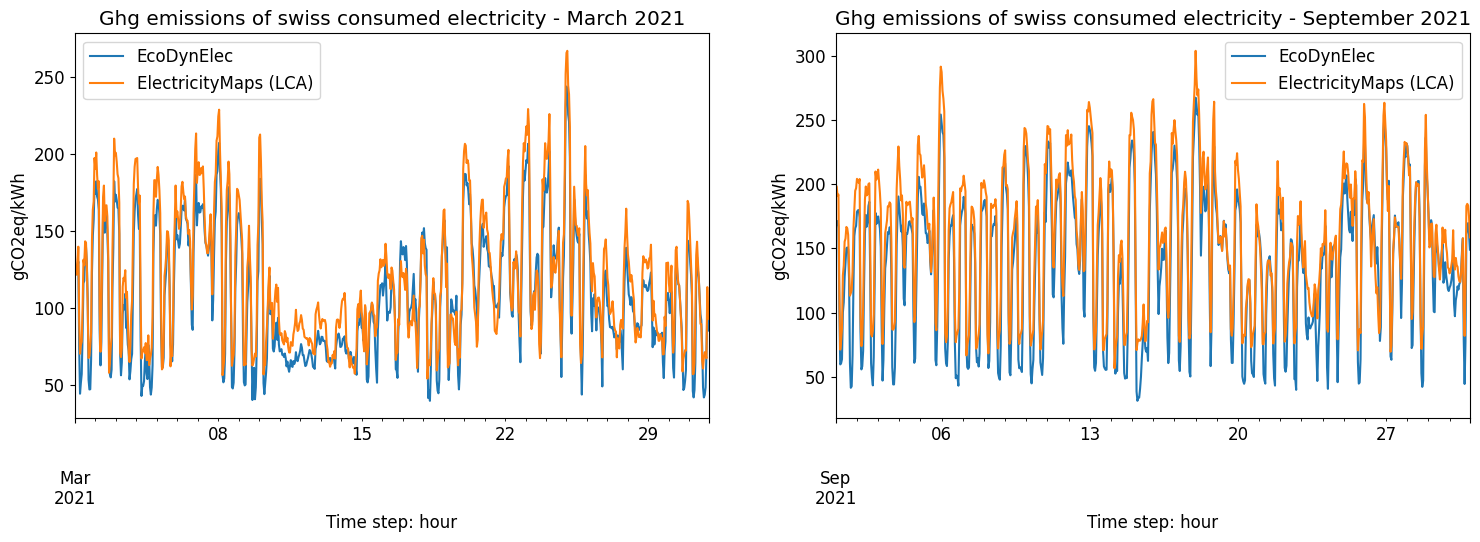

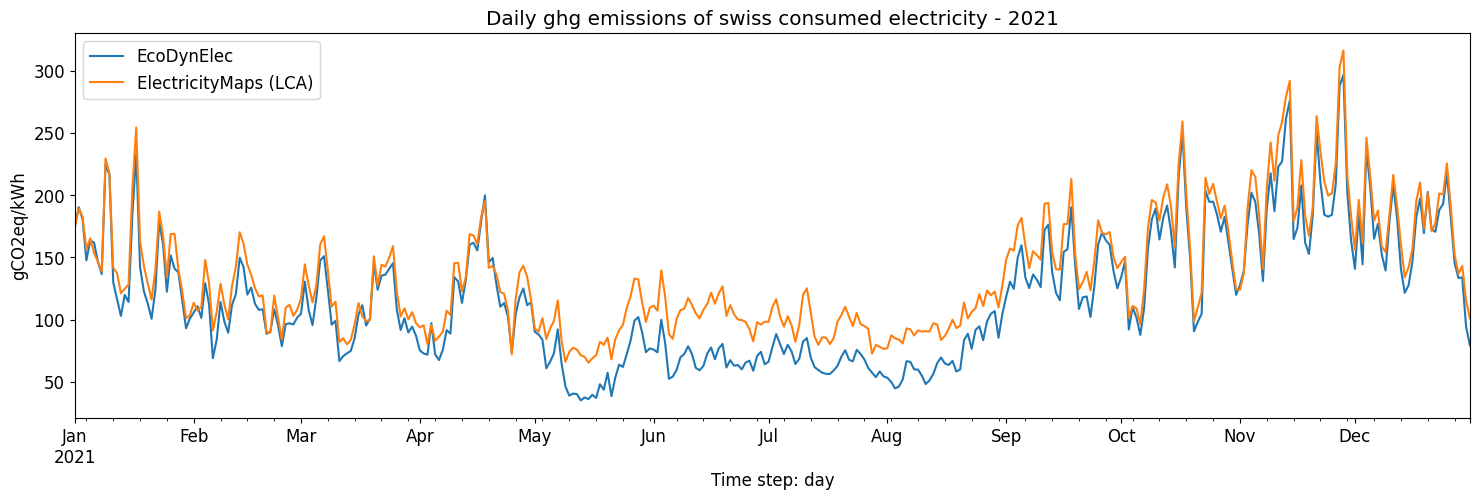

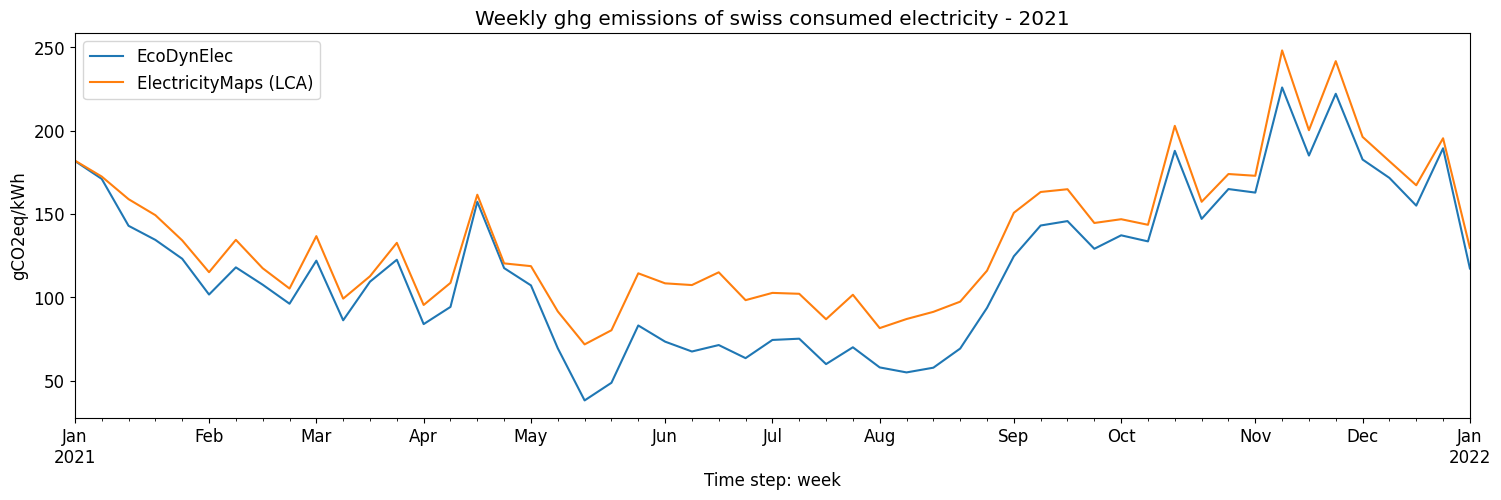

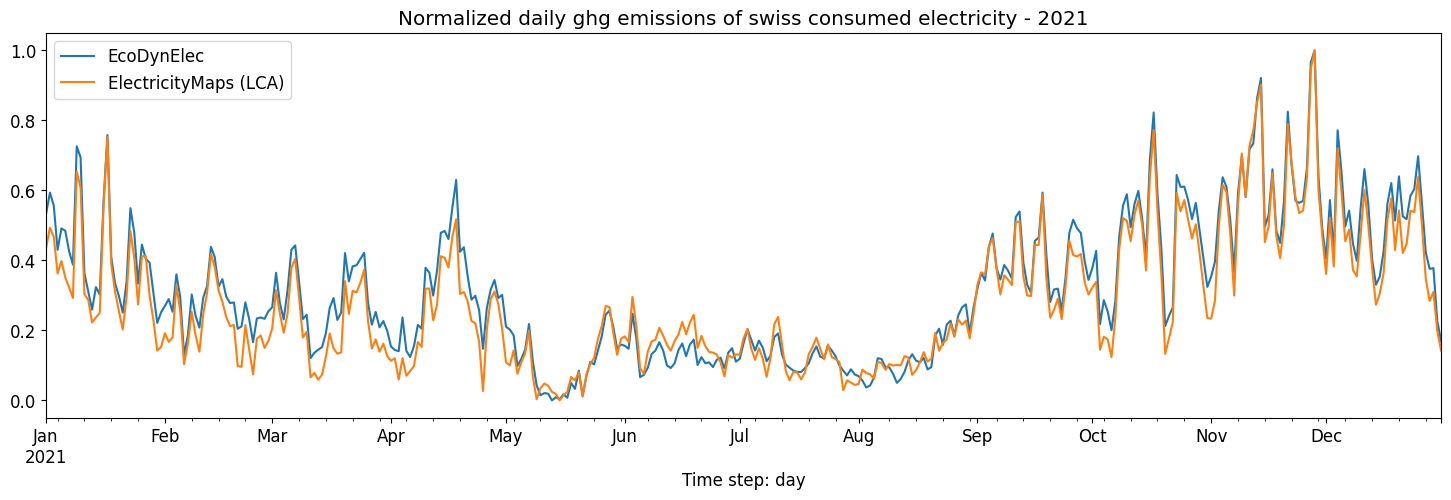

Pearson correlation: 0.9687797834282451


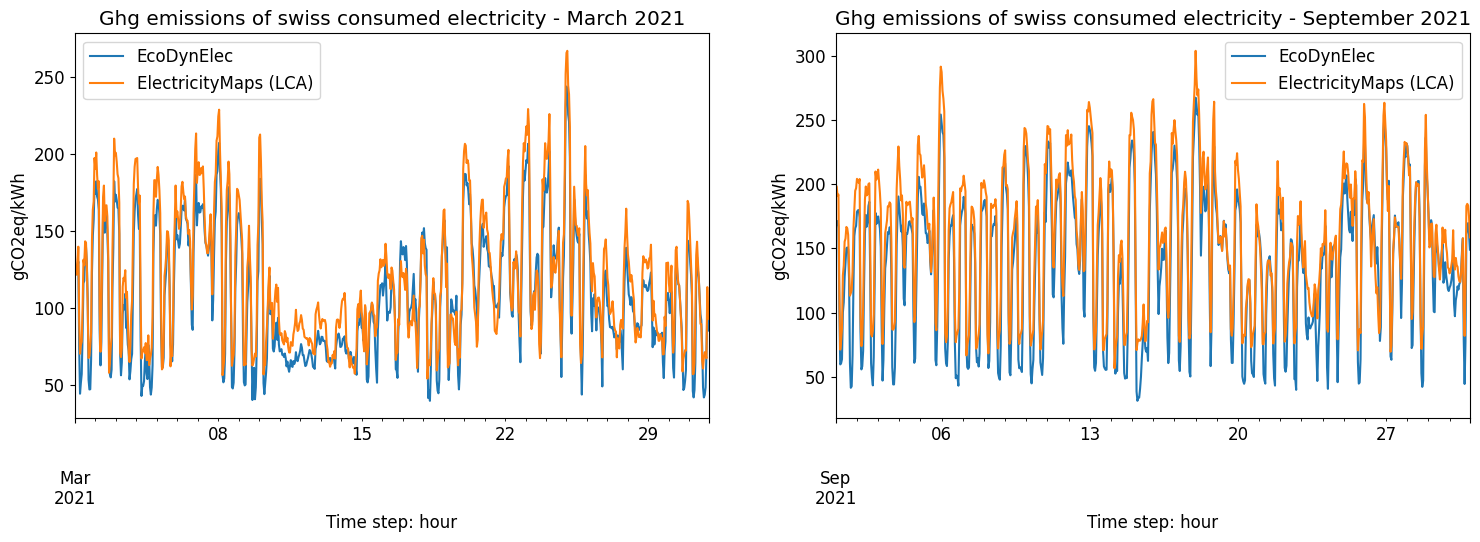

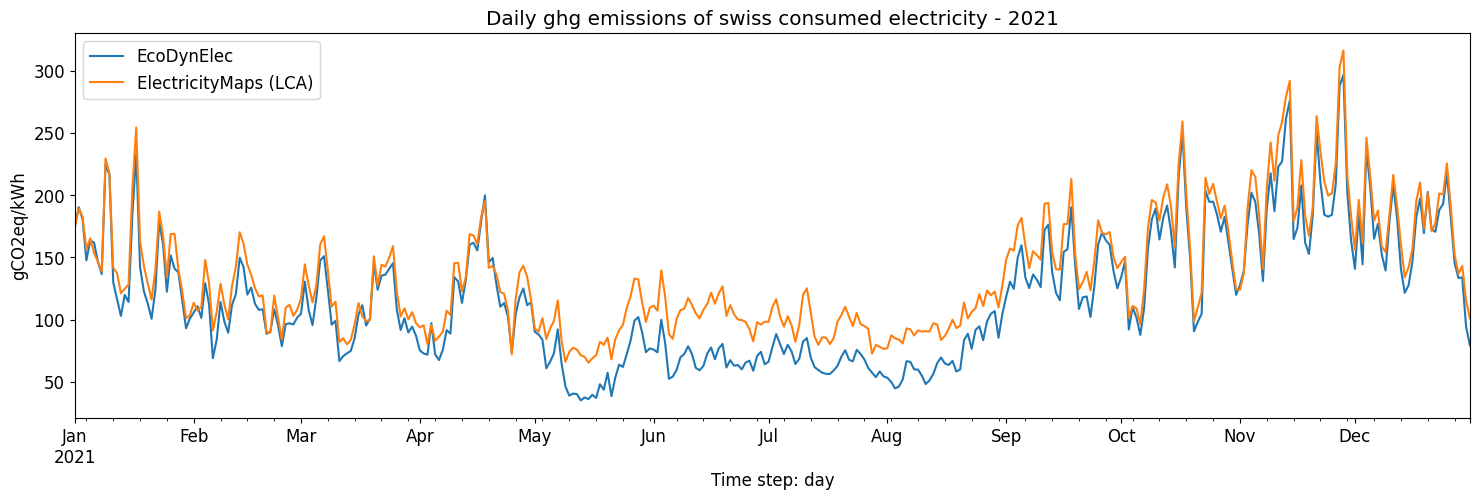

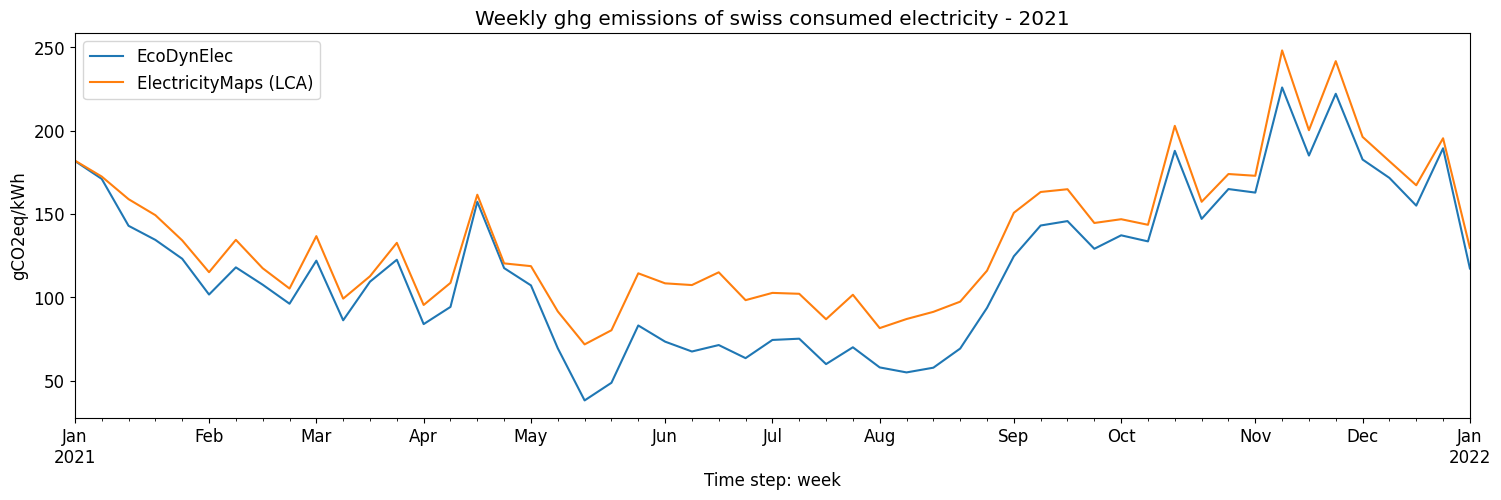

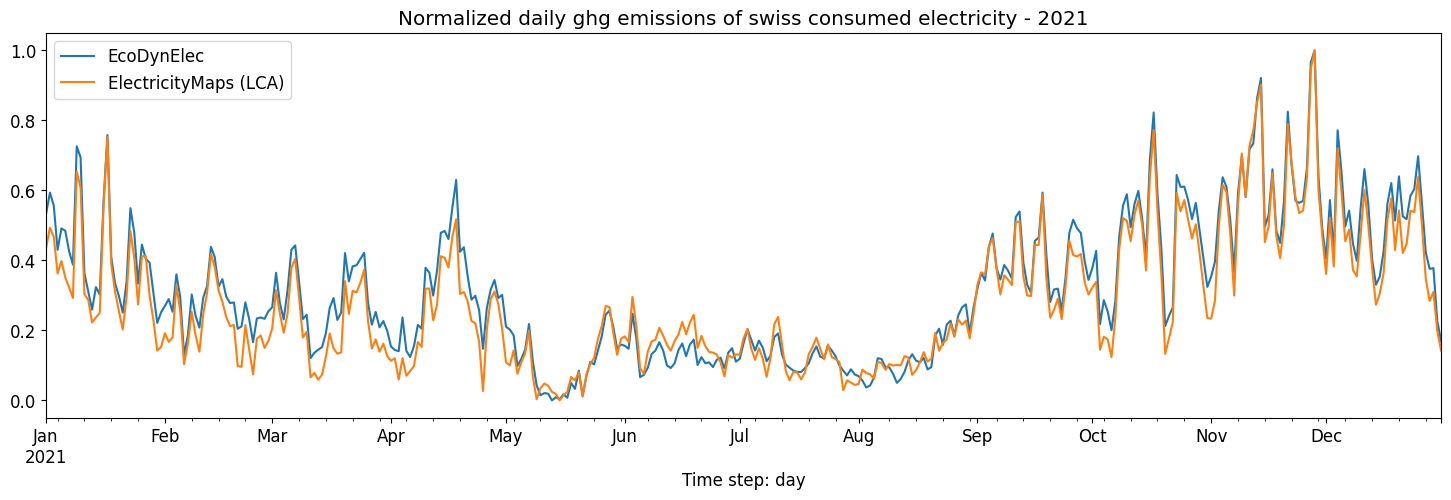

In [13]:
dt = electricity_impact['df']['sum'].loc['2021']
da = ch_em_2021['Carbon Intensity gCO₂eq/kWh (direct)']
db = ch_em_2021['Carbon Intensity gCO₂eq/kWh (LCA)']
da.index = dt.index
db.index = dt.index

print('Pearson correlation:', dt.corr(db))

fig, ax = plt.subplots(1, 2, figsize=(18, 5))
dt.loc['03-2021'].plot(ax=ax[0], legend=True, label='EcoDynElec')
db.loc['03-2021'].plot(ax=ax[0], legend=True, label='ElectricityMaps (LCA)')
ax[0].set_title('Ghg emissions of swiss consumed electricity - March 2021')
ax[0].set_xlabel('Time step: hour')
ax[0].set_ylabel('gCO2eq/kWh')
dt.loc['09-2021'].plot(ax=ax[1], legend=True, label='EcoDynElec')
db.loc['09-2021'].plot(ax=ax[1], legend=True, label='ElectricityMaps (LCA)')
ax[1].set_title('Ghg emissions of swiss consumed electricity - September 2021')
ax[1].set_xlabel('Time step: hour')
ax[1].set_ylabel('gCO2eq/kWh')
plt.show()

dt.resample('D').mean().plot(figsize=(18, 5), legend=True, label='EcoDynElec')
db.resample('D').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (LCA)')
#da.resample('D').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (direct)')
plt.title('Daily ghg emissions of swiss consumed electricity - 2021')
plt.xlabel('Time step: day')
plt.ylabel('gCO2eq/kWh')
#plt.savefig('elec_maps_comparison_daily_2021.png', dpi=300, bbox_inches='tight')
plt.show()

dt.resample('W').mean().plot(figsize=(18, 5), legend=True, label='EcoDynElec')
db.resample('W').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (LCA)')
#da.resample('W').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (direct)')
plt.title('Weekly ghg emissions of swiss consumed electricity - 2021')
plt.xlabel('Time step: week')
plt.ylabel('gCO2eq/kWh')
plt.show()

# Normalize and plot, daily
dt = dt.resample('D').mean()
db = db.resample('D').mean()
#da = da.resample('D').mean()
dt = (dt - dt.min()) / (dt.max() - dt.min())
db = (db - db.min()) / (db.max() - db.min())
#da = da / da.max()
dt.plot(figsize=(18, 5), legend=True, label='EcoDynElec')
db.plot(figsize=(18, 5), legend=True, label='ElectricityMaps (LCA)')
#da.plot(figsize=(18, 5), legend=True, label='ElectricityMaps (direct)')
plt.title('Normalized daily ghg emissions of swiss consumed electricity - 2021')
plt.xlabel('Time step: day')
#plt.ylabel('gCO2eq/kWh')
plt.show()

Pearson correlation: 0.9635852919602859


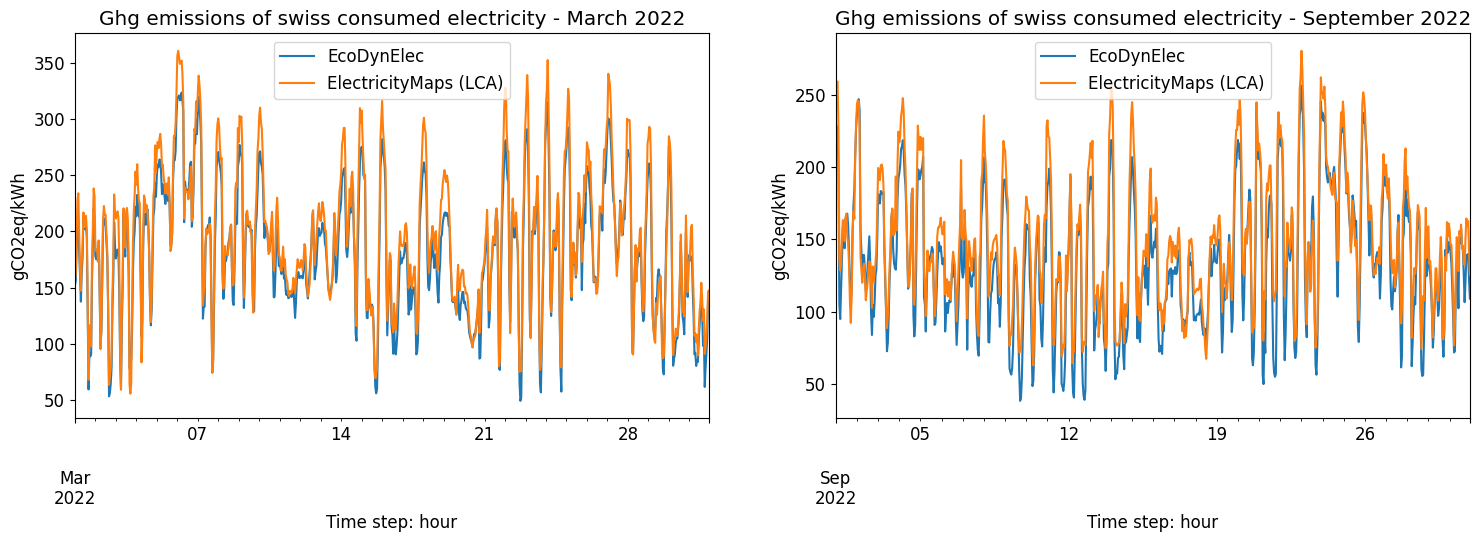

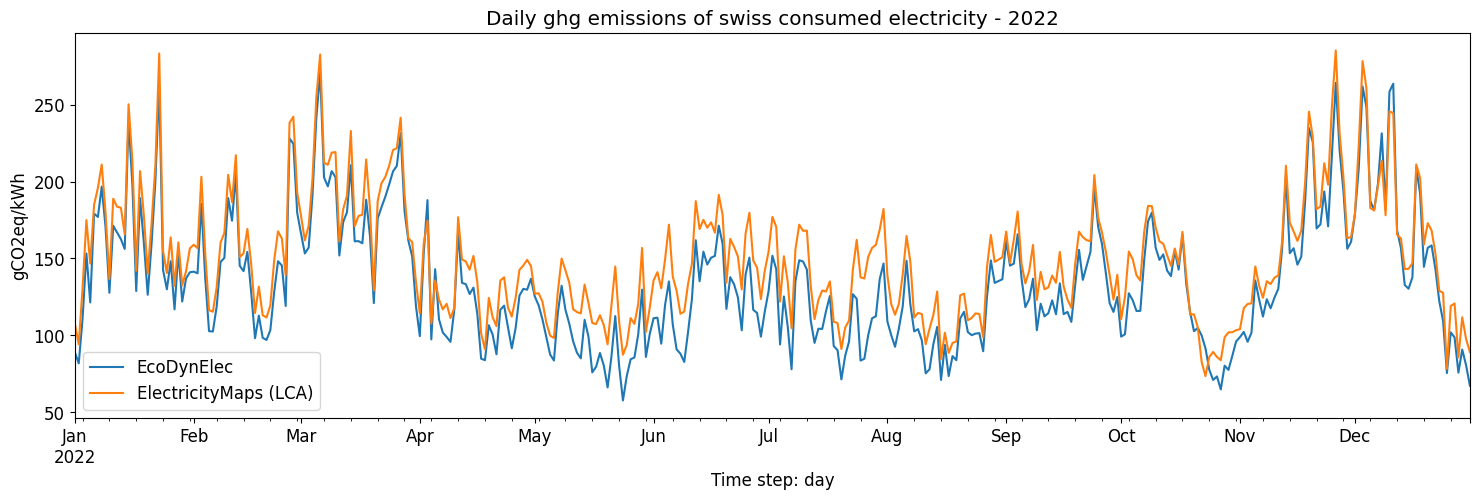

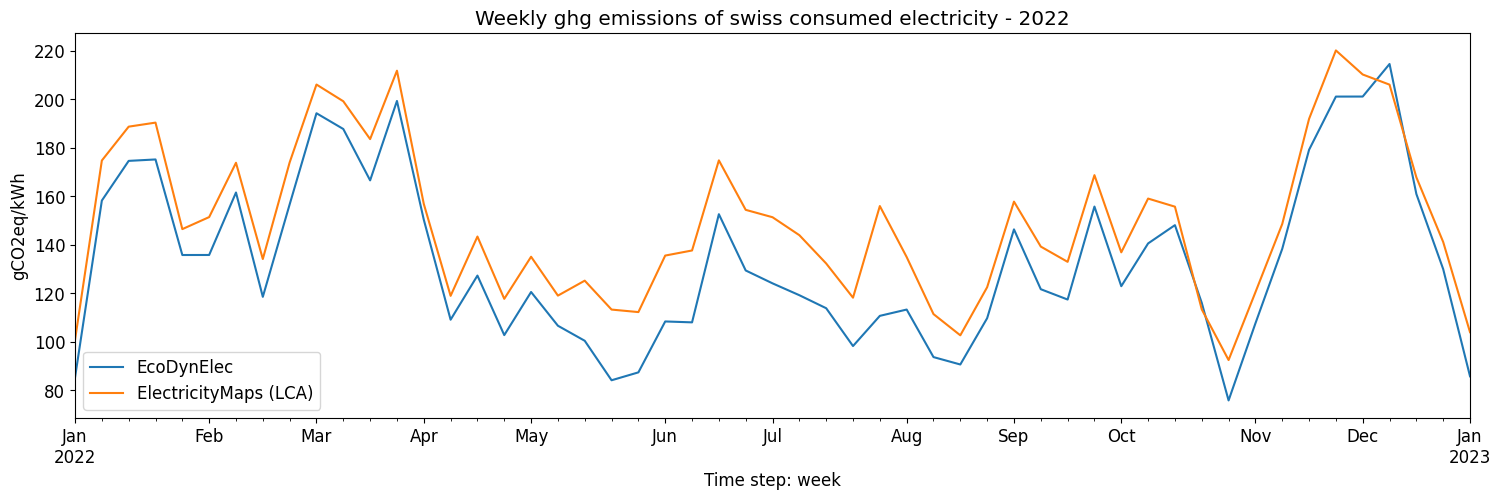

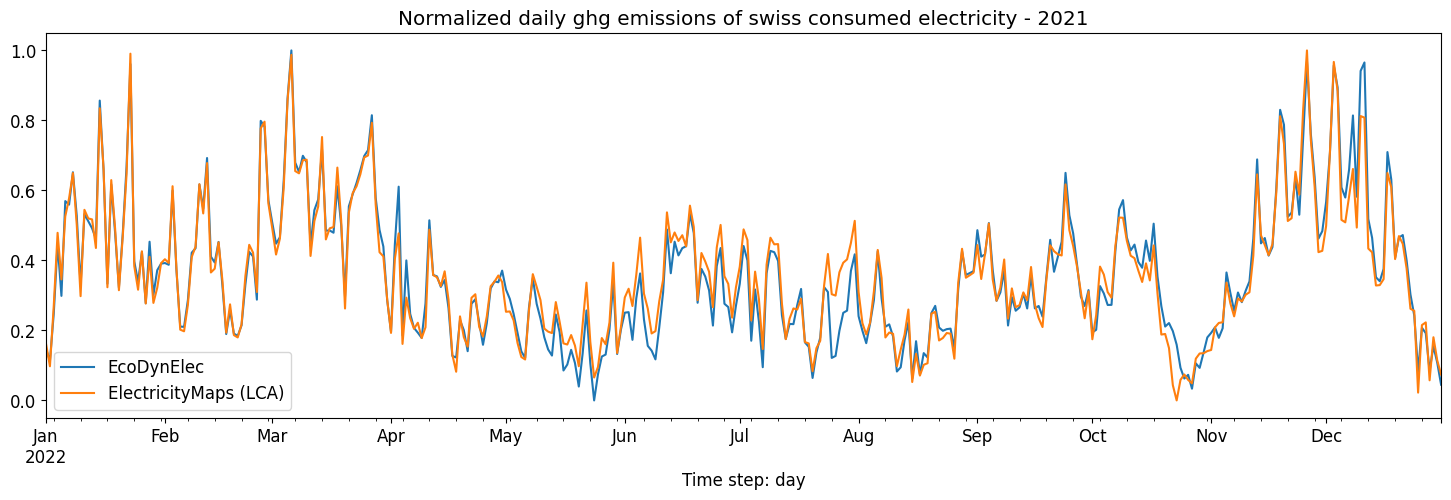

Pearson correlation: 0.9635852919602859


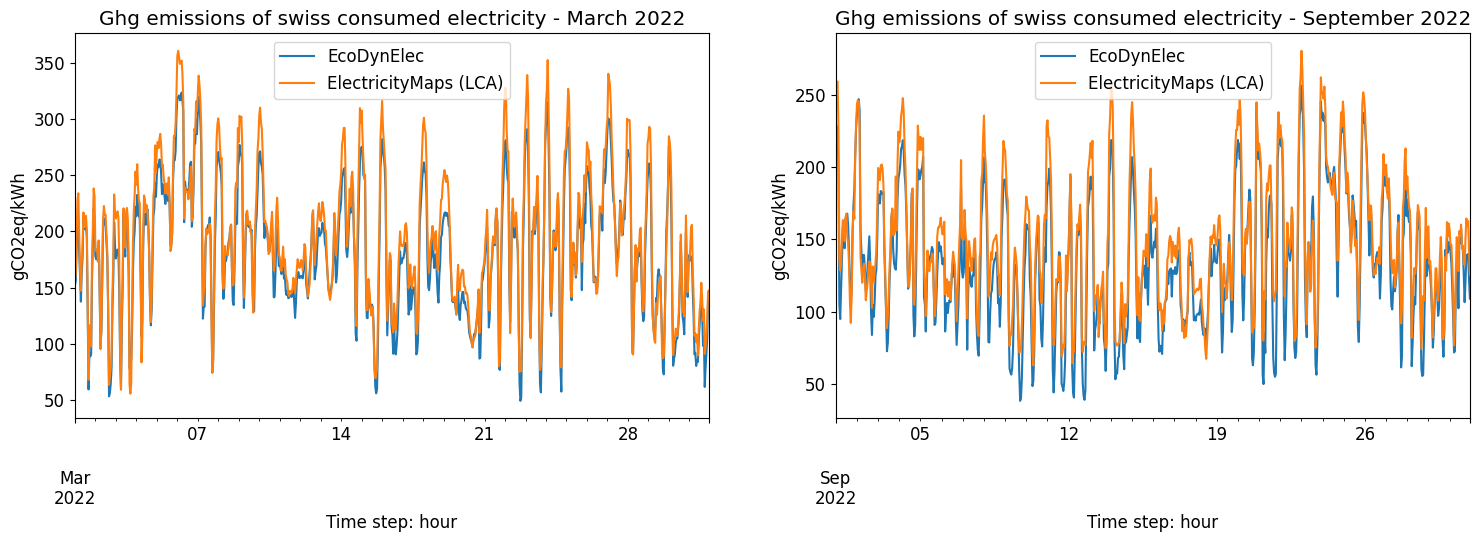

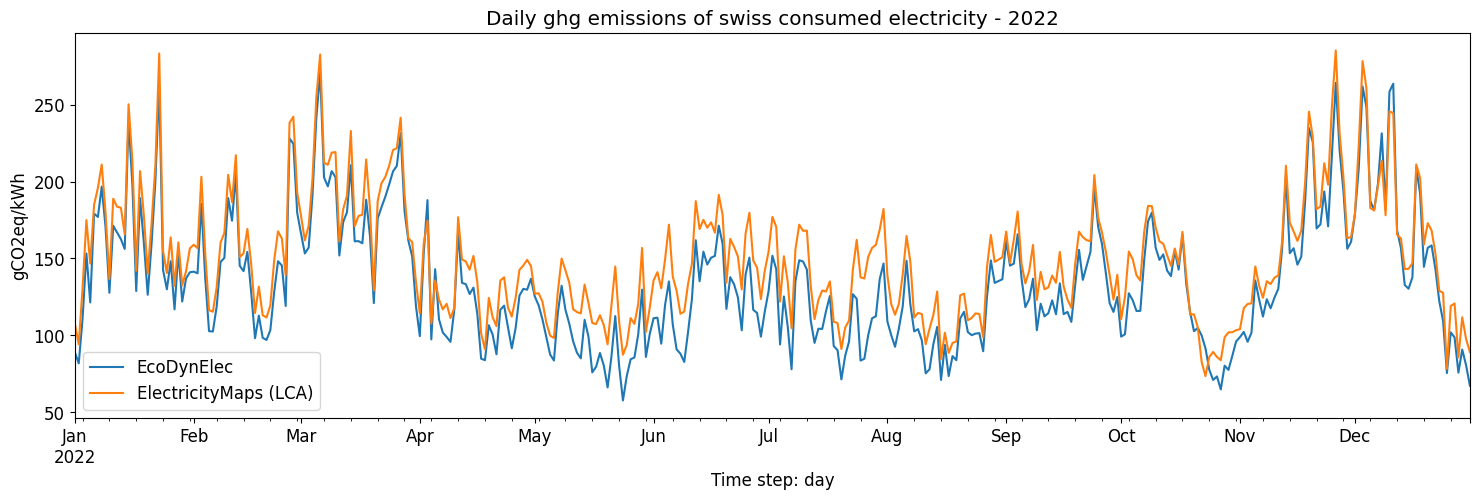

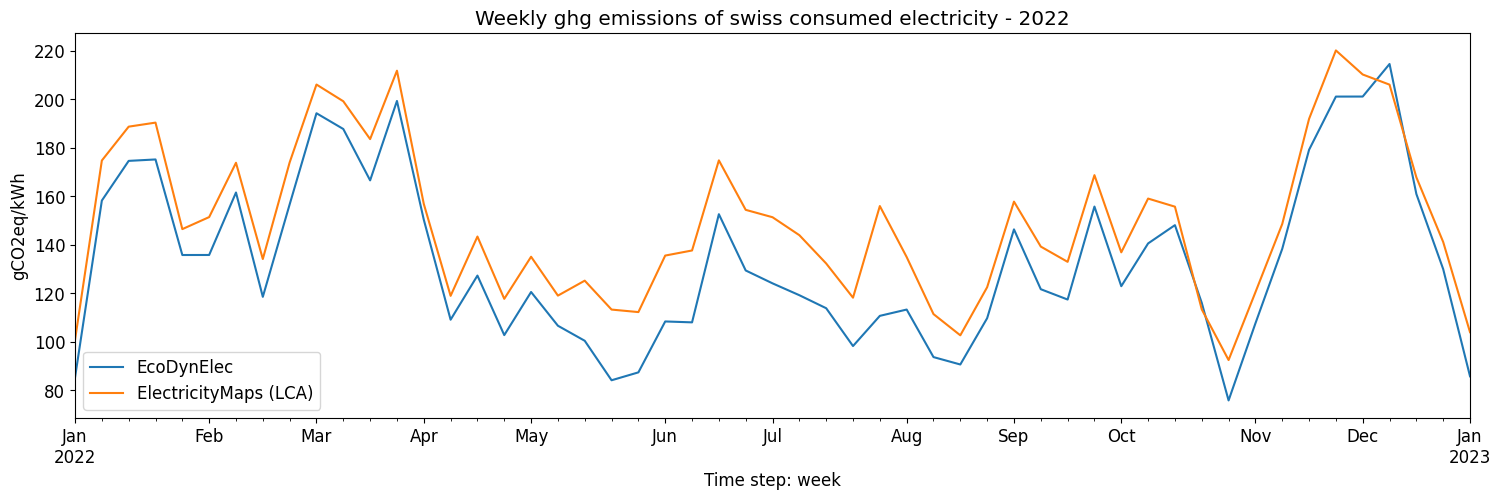

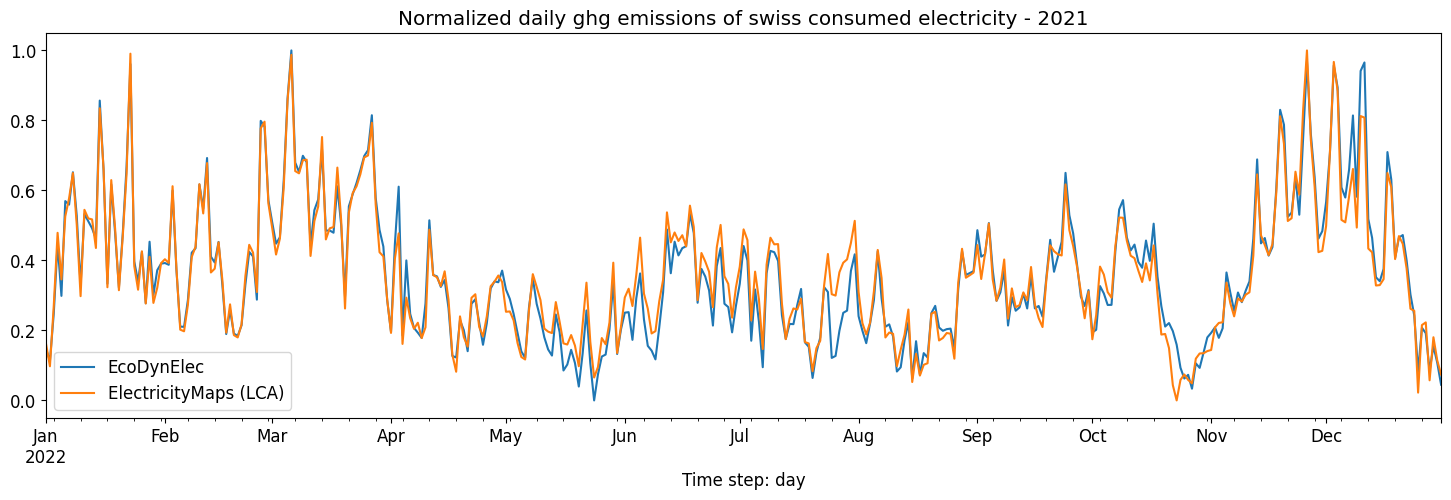

In [14]:
dt = electricity_impact['df']['sum'].loc['2022']
da = ch_em_2022['Carbon Intensity gCO₂eq/kWh (direct)']
db = ch_em_2022['Carbon Intensity gCO₂eq/kWh (LCA)']
da.index = dt.index
db.index = dt.index

print('Pearson correlation:', dt.corr(db))

fig, ax = plt.subplots(1, 2, figsize=(18, 5))
dt.loc['03-2022'].plot(ax=ax[0], legend=True, label='EcoDynElec')
db.loc['03-2022'].plot(ax=ax[0], legend=True, label='ElectricityMaps (LCA)')
ax[0].set_title('Ghg emissions of swiss consumed electricity - March 2022')
ax[0].set_xlabel('Time step: hour')
ax[0].set_ylabel('gCO2eq/kWh')
dt.loc['09-2022'].plot(ax=ax[1], legend=True, label='EcoDynElec')
db.loc['09-2022'].plot(ax=ax[1], legend=True, label='ElectricityMaps (LCA)')
ax[1].set_title('Ghg emissions of swiss consumed electricity - September 2022')
ax[1].set_xlabel('Time step: hour')
ax[1].set_ylabel('gCO2eq/kWh')
plt.show()

dt.resample('D').mean().plot(figsize=(18, 5), legend=True, label='EcoDynElec')
db.resample('D').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (LCA)')
#da.resample('D').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (direct)')
plt.title('Daily ghg emissions of swiss consumed electricity - 2022')
plt.xlabel('Time step: day')
plt.ylabel('gCO2eq/kWh')
#plt.savefig('elec_maps_comparison_daily_2022.png', dpi=300, bbox_inches='tight')
plt.show()

dt.resample('W').mean().plot(figsize=(18, 5), legend=True, label='EcoDynElec')
db.resample('W').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (LCA)')
#da.resample('W').mean().plot(figsize=(18, 5), legend=True, label='ElectricityMaps (direct)')
plt.title('Weekly ghg emissions of swiss consumed electricity - 2022')
plt.xlabel('Time step: week')
plt.ylabel('gCO2eq/kWh')
plt.show()

# Normalize and plot, daily
dt = dt.resample('D').mean()
db = db.resample('D').mean()
#da = da.resample('D').mean()
dt = (dt - dt.min()) / (dt.max() - dt.min())
db = (db - db.min()) / (db.max() - db.min())
#da = da / da.max()
dt.plot(figsize=(18, 5), legend=True, label='EcoDynElec')
db.plot(figsize=(18, 5), legend=True, label='ElectricityMaps (LCA)')
#da.plot(figsize=(18, 5), legend=True, label='ElectricityMaps (direct)')
plt.title('Normalized daily ghg emissions of swiss consumed electricity - 2021')
plt.xlabel('Time step: day')
#plt.ylabel('gCO2eq/kWh')
plt.show()